🕵️‍♂️ ステップ1：
道具の準備と現場確認

In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("--- 訓練データの概要 ---")
print(train['SalePrice'].describe())

--- 訓練データの概要 ---
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


describe() を使うことで、平均価格や最高価格（あの1298番の怪物！）の存在を、数字として改めて「再確認」できます。

🕵️‍♂️ ステップ2：ターゲット（目的変数）の可視化

「推理」の核となった「価格の歪み」を、自分の手でグラフにします。

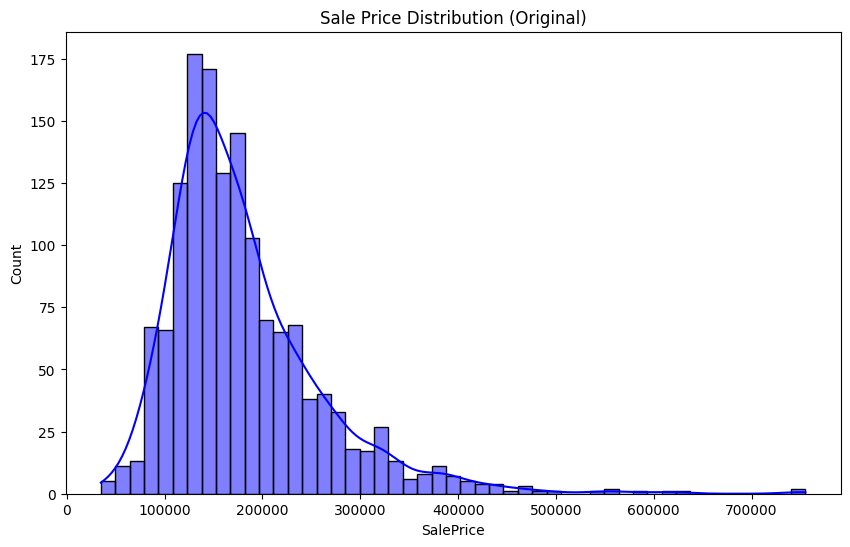

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, color='blue')
plt.title('Sale Price Distribution (Original)')
plt.show()

この「右に裾が長い」形を見て、「だから対数変換が必要だったんだ！」と昨日の理論をコードで裏付けます。

**データとの再会**

【住宅価格の統計】
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


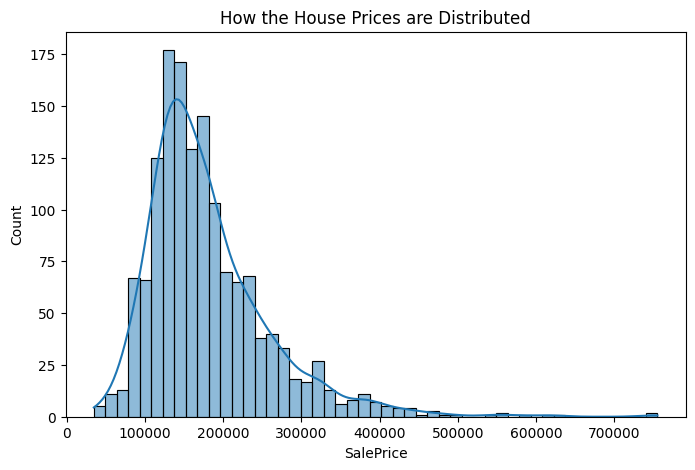

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
print("【住宅価格の統計】")
print(train['SalePrice'].describe())
plt.figure(figsize=(8, 5))
sns.histplot(train['SalePrice'], kde=True)
plt.title('How the House Prices are Distributed')
plt.show()

sns.histplot の中で使った kde=True の KDE は、データの「流れ」を読み解くためのとても便利な道具です。

KDE（Kernel Density Estimation）
日本語では 「**核密度推定（かくみつどすいてい）**」 と呼びます。

一言で言うと、「バラバラの棒グラフを、なめらかな曲線でつないで、データの『勢い（分布）』を見やすくしたもの」 です。




なぜ KDE を使うのか？
「**山」がどこにあるか一瞬でわかる**: 棒グラフ（ヒストグラム）だけだとカクカクして見づらいことがありますが、KDEの曲線があると「このあたりに価格が集中しているな」という山の頂上がはっきりします。

**データの「歪み」がバレる**: 曲線にすることで、左側に山が偏り、右側に裾が長く伸びている（＝高い家が一部だけ存在する）という、エイムズの街の「格差」がより強調されて見えます。

ここからが、1298番の「怪物」を特定したあの分析の再現です。

**広さと価格の「密接な関係」を暴く**

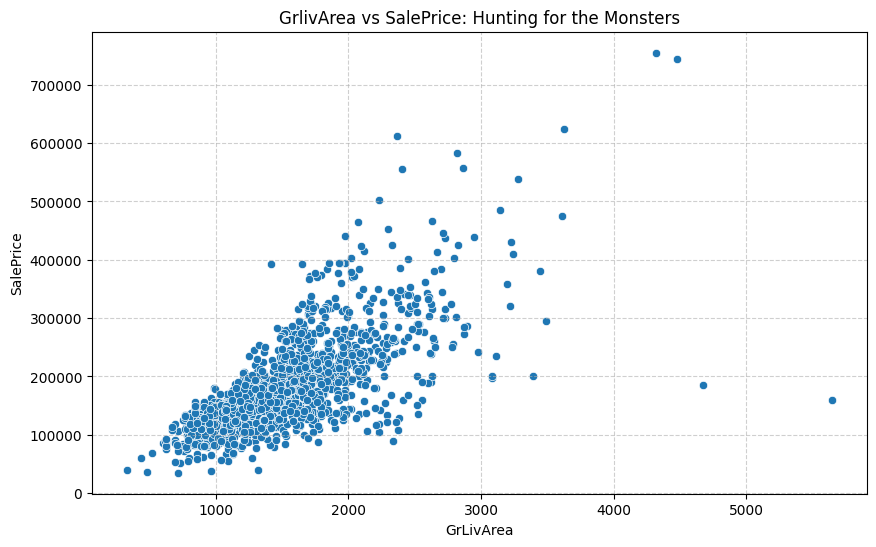

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice')
plt.title('GrlivArea vs SalePrice: Hunting for the Monsters')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

sns.scatterplot: 二つのデータの関係（相関）を点（ドット）で表す道具です。

右肩上がりのライン: 広ければ広いほど価格が高い、という「当たり前のルール」を確認します。

右下の「怪物」: このグラフを実行すると、右側の端の方に、**「めちゃくちゃ広いのに、なぜか価格が安い点（1298番たち）」**がポツンと離れて見えます。これが私たちが仕留めるべき敵です。

**3つの重要な言葉**を整理しました。これを知っておくと、コードがただの呪文ではなく、「捜査の指示」に見えてきます。


**1.** kde の相棒： bins **(ビン)**
さっきの sns.histplot で、もし bins=50 のように書くと、棒グラフの**「棒の数」**が変わります。

意味: データをいくつに細かく切り分けるか（ゴミ箱のイメージ）。

推理への影響: bins を大きくしすぎると細かすぎて全体が見えず、小さすぎると大雑把すぎて「怪物の潜伏場所」を見落とします。


**2.** alpha **(アルファ)**
散布図（scatterplot）で alpha=0.5 のように使います。

意味: **「透明度」**のことです。

推理への影響: 1298番のような「怪物」を探すとき、点が重なりすぎて真っ黒になると、どこにデータが密集しているか分かりません。alpha で少し透明にすることで、**「どこに人が多く住んでいて、どこからが異常に高い家なのか」**という「密度の差」が透けて見えるようになります。


**3.** fit **(フィット)**
今後、統計のグラフを出すときに出てくる言葉です。

意味: **「当てはめる」**こと。

推理への影響: バラバラなデータ（証拠）に対して、「理想的な形（正規分布など）」を上から重ねて、どれくらい理想からズレているかを確認する作業です。

<Axes: xlabel='SalePrice', ylabel='Count'>

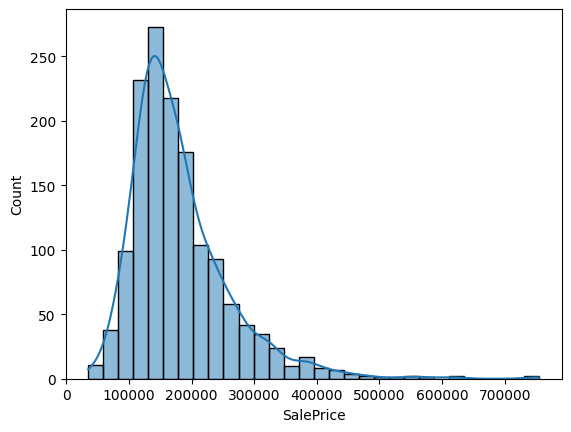

In [8]:
sns.histplot(train['SalePrice'], kde=True, bins=30)